In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
params = {'axes.labelsize': 17,
          'xtick.labelsize': 17,
          'ytick.labelsize': 17}

plt.rc('text', usetex=False)
plt.rcParams.update(params)

In [6]:
def compute_PSD(N):
    
    Df = 43.45e3
    Dt = 1/Df
    
    freq = np.fft.fftfreq(N, Dt) # [-frev/2, frev/2]
    print('sampling ratio Df={}'.format(Df))
   
    #### To obtain a more precise value of PSD, we use the average of 10000 FFTs
    fft_list = []
    for i in range(1000):
        mu, stdPhaseNoise = 0, 1e-8
        y_noise = np.random.normal(mu, stdPhaseNoise, N)
        fft = np.fft.fft(y_noise)
        fft_list.append(fft)
        
    mean_dft = np.mean(np.abs(fft_list)**2, axis=0)
    PSD = mean_dft/(Df*N**2) # power spectral density
    
    
    return PSD, freq


In [7]:
N = int(1e5)
PSD, freq = compute_PSD(N)

sampling ratio Df=43450.0


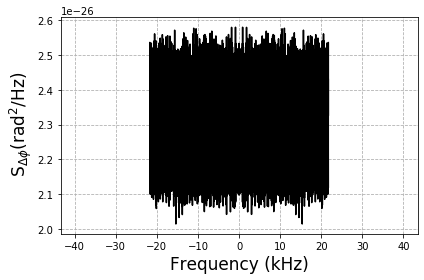

In [8]:
plt.plot(np.fft.fftshift(freq)/1000, np.fft.fftshift(PSD), c='k')
plt.xlabel('Frequency (kHz)', fontsize=17)
plt.ylabel(' S'+ r'$_{\Delta \phi}$'+ '(rad'+r'$^2$'+'/Hz)', fontsize=17)
plt.grid(linestyle='--')
#plt.ylim(1e-21, 4e-21)
plt.xlim(-43.45, 43.45)
plt.tight_layout()
#plt.savefig('PSD_rmsksi6e-2.png')